In [35]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv("E:\\LEARNBAY\\Projects\\April\\bank.csv")
df.head(3)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669


In [37]:
df.isnull().sum()

Bank                   0
DD                     0
Withdrawals            0
Deposits               0
Branch Area in sqft    0
avg daily walkins      0
dtype: int64

In [38]:
df.describe()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,258.000000,232.252427,150.693204,81.687379,2934.669903,598.603883
std,148.811962,66.648815,56.897777,28.596912,437.062831,83.487891
min,1.000000,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,129.500000,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,258.000000,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,386.500000,291.000000,200.000000,105.000000,3300.000000,657.500000
max,515.000000,350.000000,247.000000,212.000000,3650.000000,838.000000


In [39]:
#Feature SClaing

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
xsc = pd.DataFrame(sc.fit_transform(df.iloc[:,1:6]),columns = df.columns[1:])

In [40]:
xsc.head(1)

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326


In [41]:
from sklearn.cluster import KMeans

In [42]:
wcss = []

for i in range(2,15):
    kmeans =KMeans(n_clusters =i,random_state=1)
    kmeans.fit(xsc)
    wcss.append(kmeans.inertia_)

In [43]:
len(wcss)

13

In [44]:
abc=[1,2,3,4,5,6,7,8,9,10,11,12,13]

<AxesSubplot:>

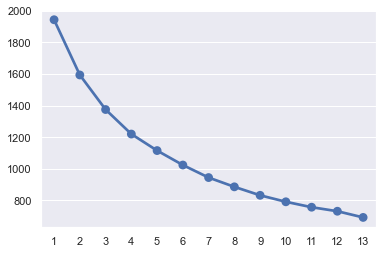

In [45]:
sns.pointplot(abc,wcss)

In [46]:
kmeans = KMeans(n_clusters=6,random_state=1)
kmeans.fit(xsc)

KMeans(n_clusters=6, random_state=1)

In [47]:
y_cluster = kmeans.fit_predict(xsc)

In [48]:
y_cluster

array([5, 0, 4, 2, 5, 3, 0, 3, 4, 1, 3, 5, 1, 2, 2, 1, 3, 2, 3, 2, 0, 0,
       3, 4, 2, 2, 5, 0, 5, 4, 1, 4, 5, 5, 2, 5, 3, 1, 4, 3, 0, 1, 2, 3,
       3, 5, 4, 2, 3, 5, 0, 1, 5, 4, 0, 4, 3, 2, 5, 2, 2, 2, 2, 5, 5, 0,
       5, 3, 0, 1, 3, 4, 5, 5, 1, 2, 2, 0, 2, 4, 1, 3, 2, 0, 1, 5, 1, 5,
       0, 2, 2, 1, 4, 5, 5, 3, 3, 4, 0, 5, 5, 3, 2, 5, 4, 5, 5, 3, 4, 2,
       5, 0, 1, 2, 5, 3, 2, 2, 2, 1, 2, 3, 1, 5, 5, 0, 2, 3, 2, 2, 0, 2,
       2, 1, 4, 5, 0, 3, 4, 5, 1, 3, 2, 4, 4, 0, 4, 2, 4, 5, 0, 4, 1, 1,
       5, 3, 2, 2, 3, 5, 3, 4, 5, 4, 4, 2, 0, 0, 4, 2, 2, 2, 1, 5, 3, 1,
       0, 5, 4, 0, 0, 3, 3, 3, 5, 2, 1, 0, 2, 0, 5, 3, 3, 2, 4, 3, 0, 3,
       5, 2, 0, 2, 2, 0, 1, 3, 3, 5, 5, 2, 2, 2, 2, 0, 2, 2, 5, 5, 2, 1,
       1, 0, 2, 2, 4, 0, 5, 3, 1, 3, 1, 3, 5, 1, 0, 5, 5, 5, 5, 2, 1, 3,
       4, 1, 4, 2, 5, 0, 5, 3, 3, 5, 3, 1, 2, 2, 0, 2, 5, 4, 4, 5, 2, 3,
       3, 3, 0, 0, 4, 1, 1, 2, 5, 5, 5, 5, 3, 4, 4, 3, 5, 5, 5, 1, 5, 1,
       5, 4, 1, 2, 2, 4, 2, 0, 2, 2, 4, 3, 5, 4, 4,

In [49]:
report = pd.concat([df,pd.DataFrame(y_cluster)],axis=1)

In [50]:
final_report = report.to_csv("Bank_Cluster.csv")

# Done